# PROJECT

**NOME:** Christian

**COGNOME:** Uccheddu

**MATRICOLA:** 800428

> This project is based on the code of Prof. Samuel Albani left during the lessons.

First the necessary libraries are imported in which the relative versions are also printed so that everything is reproducible.

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy import stats
import scipy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import seaborn
from pylab import *
import matplotlib.gridspec as gridspec
from cartopy.util import add_cyclic_point
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pmdarima as pm
import statsmodels

import datetime as dtm
from datetime import datetime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import matplotlib
import cartopy
import xarray as xr


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

pd.options.mode.chained_assignment = None

print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Cartopy version:",cartopy.__version__)
print("Geoandas version:",gpd.__version__)
print("Matplotlib version:",matplotlib.__version__)
print("Scipy version:",scipy.__version__)
print("Seaborn version:",sns.__version__)
print("Xarray version:",xr.__version__)
print("Pmdarima version:",pm.__version__)
print("Statsmodels version:",statsmodels.__version__)

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

Pandas version: 1.2.3
Numpy version: 1.19.2
Cartopy version: 0.18.0
Geoandas version: 0.8.1
Matplotlib version: 3.3.4
Scipy version: 1.6.1
Seaborn version: 0.11.1
Xarray version: 0.17.0
Pmdarima version: 1.8.0
Statsmodels version: 0.12.2


/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 

## Import data

At this point I import the 4 files that contain the three models. In particular, the last model is divided into two files which will then be concatenated to have a single model.

In [2]:
modfile='dati/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
modfile2='dati/ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'
modfile3='dati/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc'
modfile4='dati/ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc'

Now I extract the time series that we will need to visualize the data on graphs. I also concatenate the third and fourth time series into a single time series.

In [3]:
d1d = xr.open_dataset(modfile)
ts1 = d1d.ts  

d2d = xr.open_dataset(modfile2)
ts2 = d2d.ts  

d3d = xr.open_dataset(modfile3)
ts3 = d3d.ts  

d4d = xr.open_dataset(modfile4)
ts4 = d4d.ts  

m5 = xr.concat([ts3, ts4], dim = "time")

I make a plot of the means of the three time series so that I can visualize them on a map. In particular they have been colored with the "coolwarm" colormap which gives a good idea of which areas are warmer than others. I leave all three in the same figure using matplotlib's **gridspec** which allows you to define fully customizable grids.

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


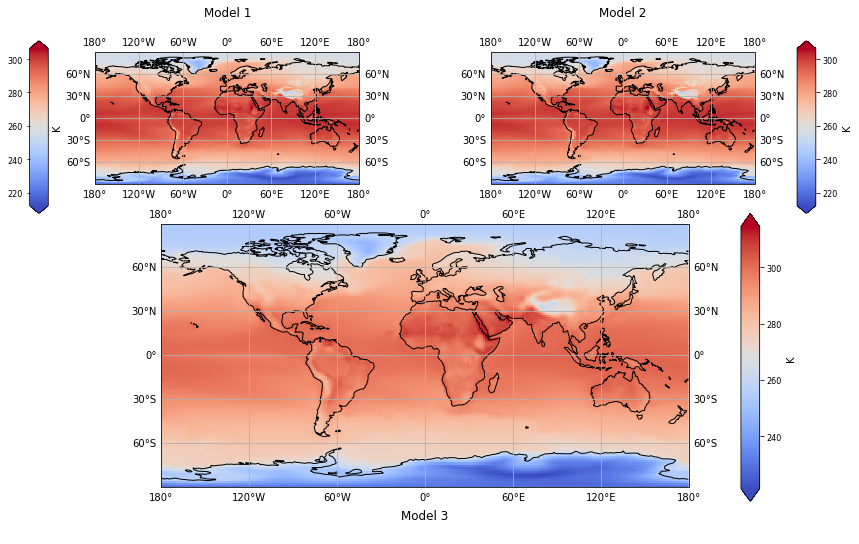

In [4]:
# Define the figure and the grid to fill with the three different plot
fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 2], hspace = 0.2)

# Define the color map
cmap = mpl.cm.coolwarm

# Plot of the first time series
ax0 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax0.set_title('Model 1\n')
ax0.set_global()
mm0 = ax0.pcolormesh(ts1.lon, ts1.lat, ts1.mean(axis = 0), \
                   transform=ccrs.PlateCarree(),cmap=cmap)  
ax0.coastlines()
ax0.gridlines(draw_labels=True)
cbar_ax0 = fig.add_axes([0.09, 0.6, 0.02, 0.30]) #[left, bottom, width, height]
cbar0 = fig.colorbar(mm0, cax=cbar_ax0, extend='both', orientation='vertical')
cbar0.set_label('K')
cbar0.ax.tick_params(labelsize=8)
cbar_ax0.yaxis.tick_left()

# Plot of the second time series
ax1 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
ax1.set_title('Model 2\n')
ax1.set_global()
mm1 = ax1.pcolormesh(ts1.lon, ts1.lat, ts1.mean(axis = 0), \
                   transform=ccrs.PlateCarree(),cmap=cmap)  
ax1.coastlines()
ax1.gridlines(draw_labels=True)
cbar_ax1 = fig.add_axes([0.91, 0.6, 0.02, 0.30]) #[left, bottom, width, height]
cbar1 = fig.colorbar(mm1, cax=cbar_ax1, extend='both', orientation='vertical')
cbar1.set_label('K')
cbar1.ax.tick_params(labelsize=8)

# Plot of the third time series
ax2 = fig.add_subplot(gs[1:, :], projection=ccrs.PlateCarree())
ax2.set_title("Model 3\n", y=-0.2)
ax2.set_global()
mm2 = ax2.pcolormesh(m5.lon, m5.lat, m5.mean(axis = 0), \
                   transform=ccrs.PlateCarree(),cmap=cmap )  
ax2.coastlines()
ax2.gridlines(draw_labels=True)
cbar_ax2 = fig.add_axes([0.85, 0.1, 0.02, 0.50]) #[left, bottom, width, height]
cbar2 = fig.colorbar(mm2, cax=cbar_ax2, extend='both', orientation='vertical')
cbar2.set_label('K')
cbar2.ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

At this point I do the regridding operation bringing all three time series to a single grid in order to create the ensemble model in a simpler way.

In [5]:
ts1_regridded = ts1.copy()
ts2_regridded = ts2.interp(lat=ts1.lat, lon=ts1.lon, method='linear')
ts3_regridded = m5.interp(lat=ts1.lat, lon=ts1.lon, method='linear')

First, I separately extrapolate the three time series by averaging along the time dimension by aggregating by year. Subsequently I aggregate these three time series spatially (always distinctly) in order to have a single value for each year for each time series.


In [6]:
ens_mean_month = np.nanmean([ts1_regridded.mean(("lon", "lat")), ts2_regridded.mean(("lon", "lat")), ts3_regridded.mean(("lon", "lat"))], axis=0)

In [7]:
ens_month = pd.concat([pd.Series(ts1_regridded.time, name = "time"), pd.Series(ens_mean_month, name = "Ensemble mean")], axis = 1, ignore_index = True)
ens_month.columns = ['time', 'Ensemble historical']
ens_month['time'] = pd.to_datetime(ens_month['time'], format = "%Y-%m-%d %H:%M:%S")
ens_month = ens_month[ens_month['time'].dt.year >= 1901]
ens_month['year'] = ens_month['time'].dt.year
ens_month['month'] = ens_month['time'].dt.month
ens_month.drop("time", axis = 1, inplace = True)

ens_month.head()

Ensemble historical  year  month
612           277.620591  1901      1
613           276.748314  1901      2
614           276.547885  1901      3
615           277.742982  1901      4
616           279.477199  1901      5

We keep the historical series of monthly anomalies since working with Machine Learning techniques it is better to have more data.

In [8]:
ref_month = ens_month.loc[(ens_month['year'] >= 1961) & (ens_month['year'] <= 1990)].groupby("month").mean().reset_index().drop("year", axis = 1)
ref_month.columns = ['month', 'reference temperature']
ref_month

month  reference temperature
0       1             277.564074
1       2             276.982217
2       3             276.806702
3       4             277.878794
4       5             279.670381
5       6             281.223710
6       7             281.735931
7       8             281.356015
8       9             280.205231
9      10             279.032454
10     11             278.267180
11     12             277.984777

In [9]:
anomaly_month = pd.merge(ens_month, ref_month, on = "month", how = "inner")
anomaly_month['anomaly'] = anomaly_month['Ensemble historical'] - anomaly_month['reference temperature']
anomaly_month = anomaly_month.sort_values(['year', 'month']).reset_index().drop("index", axis = 1)

I merge the two datasets in order to make the difference with the corresponding month and have the final dataset that contains the historical series of anomalies for each year.

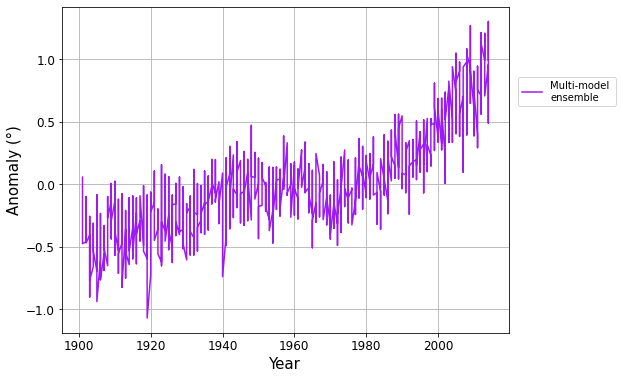

In [10]:
plt.figure(figsize = (8,6))

p1, = plt.plot(anomaly_month['year'], anomaly_month['anomaly'], color = "#9D1AF4", ls = "-")

plt.legend([p1], [ "Multi-model \nensemble"],
           bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Anomaly (°)", fontsize = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.grid()

## ARIMA

I build the dataframe so that it can be easily passed to the ARIMA models. In particular, I use the date in datetime format as an index and I keep the column **anomaly** the column in which the historical series is present.

In [11]:
df = anomaly_month.copy()
df = df.drop(['Ensemble historical', 'reference temperature'], axis = 1)
df['date'] = pd.to_datetime(df['year'] * 10000 + df['month'] * 100 + 1, format="%Y%m%d")
df = df.drop(['year', 'month'], axis = 1)
df.set_index('date', inplace=True)

In [12]:
df

anomaly
date                
1901-01-01  0.056517
1901-02-01 -0.233903
1901-03-01 -0.258817
1901-04-01 -0.135811
1901-05-01 -0.193181
...              ...
2014-08-01  0.795933
2014-09-01  0.949292
2014-10-01  1.302075
2014-11-01  1.263501
2014-12-01  0.993864

[1368 rows x 1 columns]

I divide the time series into two parts: the train part which contains all the observations minus the last 3 years and the validation part which contains the last 3 years of observations so that you can compare the MSEs between the various models and decide which one is the best. Then I'll fit all the models among all the historical series and make the prediction for the next three years

In [13]:
df_train = df.iloc[:1332]
df_val = df.iloc[1332:]

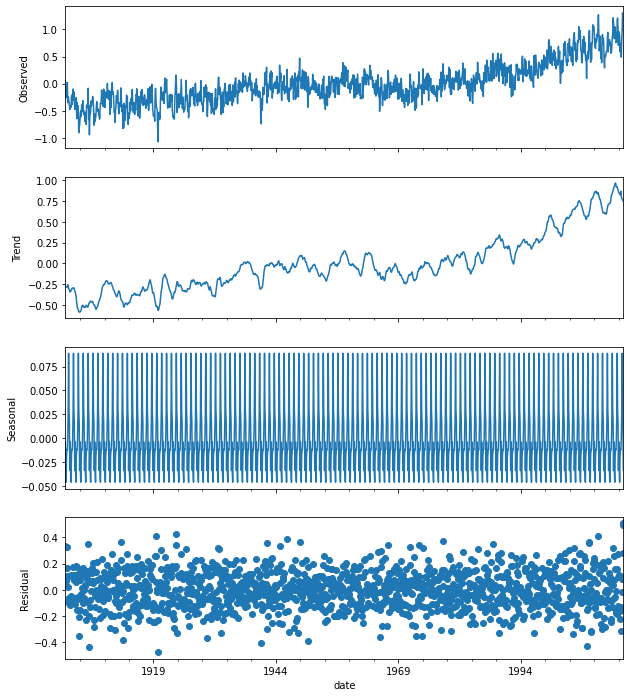

In [14]:
# Additive Decomposition 
result_add = seasonal_decompose(df['anomaly'], model='additive', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,12))
result_add.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result_add.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result_add.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result_add.resid.plot(ax=axes[3], legend=False, style='o')
axes[3].set_ylabel('Residual')
plt.show()

In [15]:
smodel = pm.auto_arima(df_train['anomaly'], start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-193.433, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-642.596, Time=1.02 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-917.955, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-193.950, Time=0.12 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-291.750, Time=0.24 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-916.231, Time=1.73 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-916.296, Time=5.30 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-575.140, Time=0.96 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-916.461, Time=9.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-739.468, Time=1.16 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=-1012.713, Time=1.55 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=-342.697, Time=0.52 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=-1010.716, Time=3.39 sec
 ARIMA(0,0,2)(0,1,2)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1332
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood                 527.094
Date:                              Mon, 26 Apr 2021   AIC                          -1042.188
Time:                                      12:42:09   BIC                          -1011.076
Sample:                                           0   HQIC                         -1030.523
                                             - 1332                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0099      0.001      8.029      0.000       0.007       0.012
ma.L1          0.3390      0.028     12.253      0.000       0.285       0.393
ma.L2          0.2694      0.030      9.023      0.000       0.211       0.328
ma.L3          0.1443      0.027      5.425      0.000       0.092       0.196
ma.S.L12      -0.8515      0.015    -55.204      0.000      -0.882      -0.821
sigma2         0.0260      0.001     25.469      0.000       0.024       0.028
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.37   Prob(JB):                         0.25
Heteroskedasticity (H):               1.08   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

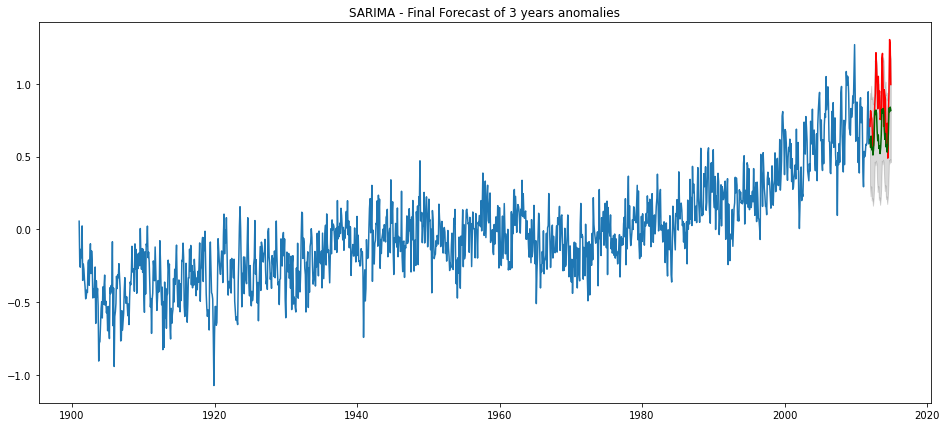

In [16]:
n_periods = 36
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_train['anomaly'].index[-1], periods=n_periods, freq='M')

# make series for plotting purpose
fitted_series_auto = pd.Series(fitted, index=index_of_fc)
lower_series_auto = pd.Series(confint[:, 0], index=index_of_fc)
upper_series_auto = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(df_train['anomaly'])
plt.plot(df_val['anomaly'], color='red')

plt.plot(fitted_series_auto, color='darkgreen')
plt.fill_between(lower_series_auto.index, 
                 lower_series_auto, 
                 upper_series_auto, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

Lets' focus only on the predictions

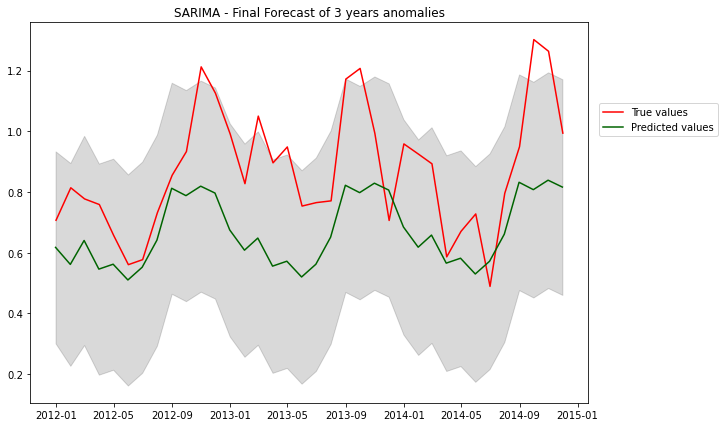

In [17]:
plt.figure(figsize=(10, 7))

plt.plot(df_val['anomaly'], color='red', label = "True values")

plt.plot(fitted_series_auto, color='darkgreen', label = "Predicted values")
plt.fill_between(lower_series_auto.index, 
                 lower_series_auto, 
                 upper_series_auto, 
                 color='k', alpha=.15)

plt.legend(bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

In [19]:
mse_autoarima = ((df_val['anomaly'].values - fitted_series_auto.values)**2).mean()
mse_autoarima

0.061407209671256666

## Customized ARIMA

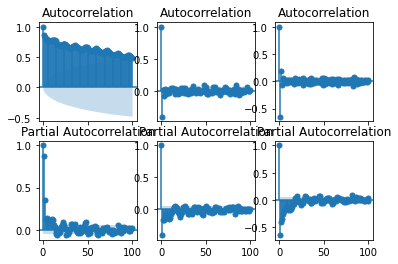

In [20]:
fig, axes = plt.subplots(2, 3, sharex=True)

plot_acf(df['anomaly'].dropna(),  lags=100, ax=axes[0,0])
plot_acf(df['anomaly'].diff().dropna(), lags=100, ax=axes[0,1])
plot_acf(df['anomaly'].diff().diff().dropna(), lags=100, ax=axes[0,2])

plot_pacf(df['anomaly'].dropna(),  lags=100, ax=axes[1,0])
plot_pacf(df['anomaly'].diff().dropna(), lags=100, ax=axes[1,1])
plot_pacf(df['anomaly'].diff().diff().dropna(), lags=100, ax=axes[1,2])

plt.show()

Sembra che ci voglia un AR(2), pensiamo già a come inserire dei regressori esterni, possibilmente come armoniche

In [21]:
model = ARIMA(df_train['anomaly'], order = (2,1,1), seasonal_order = (2,0,1,12),trend = "t", dates = df.index)
res = model.fit()
print(res.summary())

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    SARIMAX Results                                     
Dep. Variable:                          anomaly   No. Observations:                 1332
Model:             ARIMA(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                 592.454
Date:                          Mon, 26 Apr 2021   AIC                          -1168.907
Time:                                  12:42:38   BIC                          -1127.358
Sample:                              01-01-1901   HQIC                         -1153.336
                                   - 12-01-2011                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0010      0.000      3.107      0.002       0.000       0.002
ar.L1          0.2876      0.027     10.777      0.

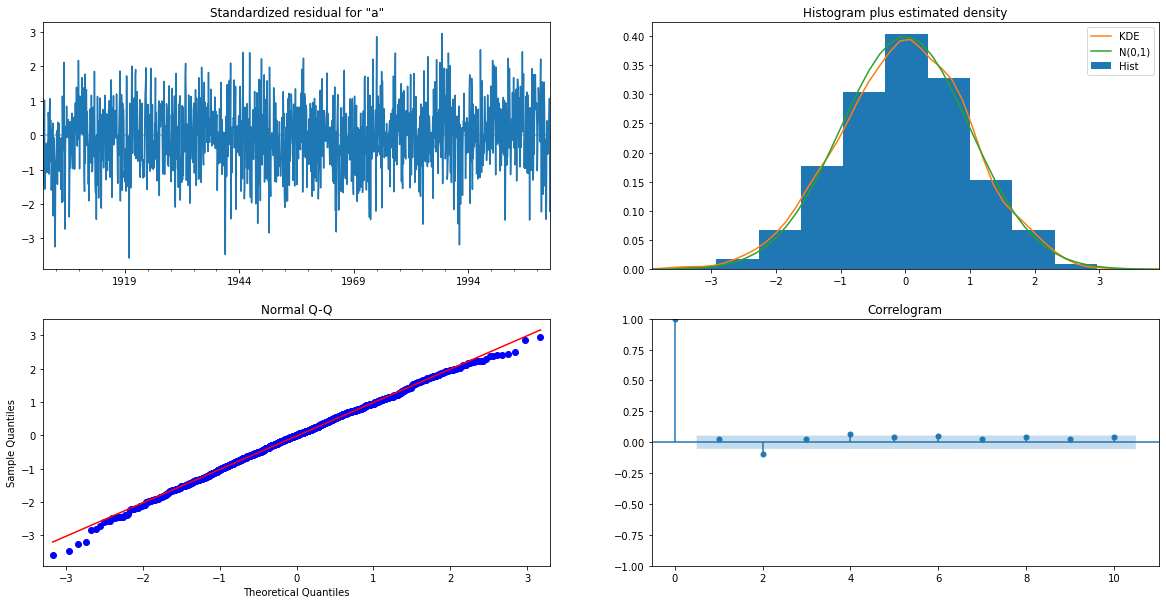

In [22]:
res.plot_diagnostics(figsize=(20,10))
plt.show()

C'è un forte ritardo sul primo, bisognerebbe aggiungere una differenziazione

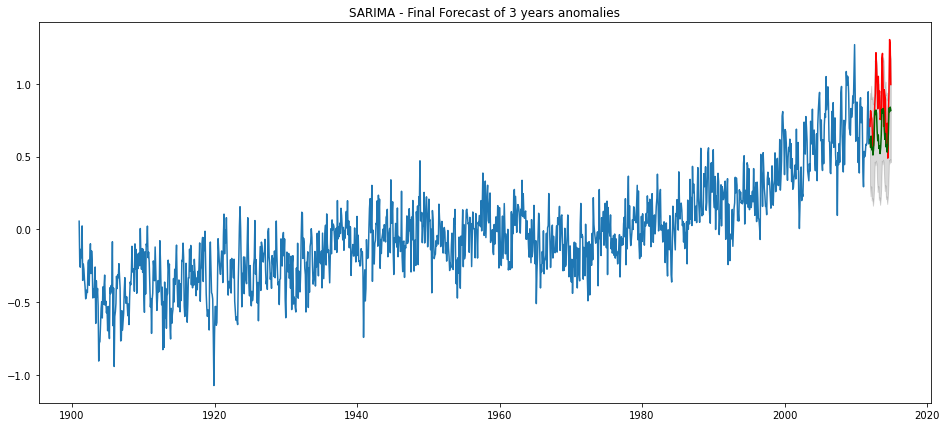

In [23]:
n_periods = 36
fittedparam_termsfint = res.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_train['anomaly'].index[-1], periods=n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(df_train['anomaly'])
plt.plot(df_val['anomaly'], color='red')

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

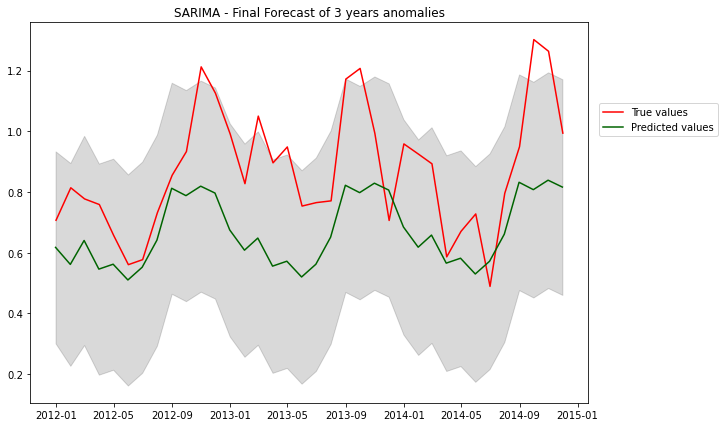

In [24]:
plt.figure(figsize=(10, 7))

plt.plot(df_val['anomaly'], color='red', label = "True values")

plt.plot(fitted_series, color='darkgreen', label = "Predicted values")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.legend(bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

In [25]:
mse_arima = ((df_val['anomaly'].values - fitted_series.values)**2).mean()
mse_arima

0.061407209671256666

# Prophet

In [26]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

Importing plotly failed. Interactive plots will not work.


In [27]:
df = anomaly_month.copy()
df = df.drop(['Ensemble historical', 'reference temperature'], axis = 1)
df['ds'] = pd.to_datetime(df['year'] * 10000 + df['month'] * 100 + 1, format="%Y%m%d")
df = df.drop(['year', 'month'], axis = 1)
df.columns = ['y', 'ds']

In [28]:
df_train = df.iloc[:1332]
df_val = df.iloc[1332:]

In [29]:
model2 = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2) 
model2.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
model2.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# define the period for which we want a prediction
future = model2.make_future_dataframe(freq='M', periods=36)

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model2.predict(future)

In [31]:
forecast = model2.predict(future)

          ds      yhat  yhat_lower  yhat_upper
0 1901-01-01 -0.195115   -0.514315    0.115988
1 1901-02-01 -0.223256   -0.553372    0.112557
2 1901-03-01 -0.300844   -0.620706    0.008038
3 1901-04-01 -0.258723   -0.577964    0.057190
4 1901-05-01 -0.269036   -0.583338    0.029322


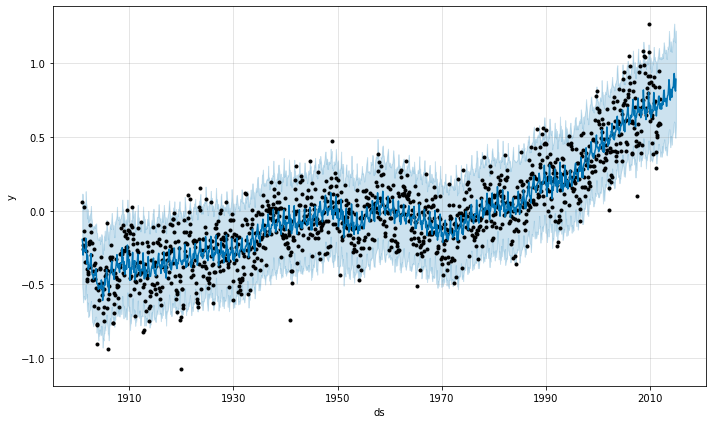

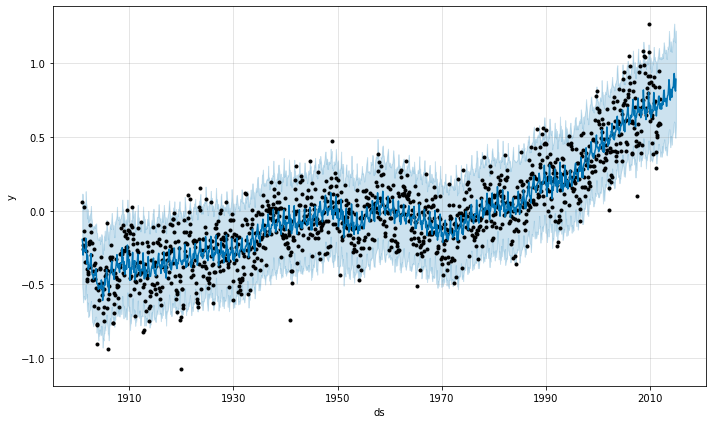

In [32]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model2.plot(forecast)

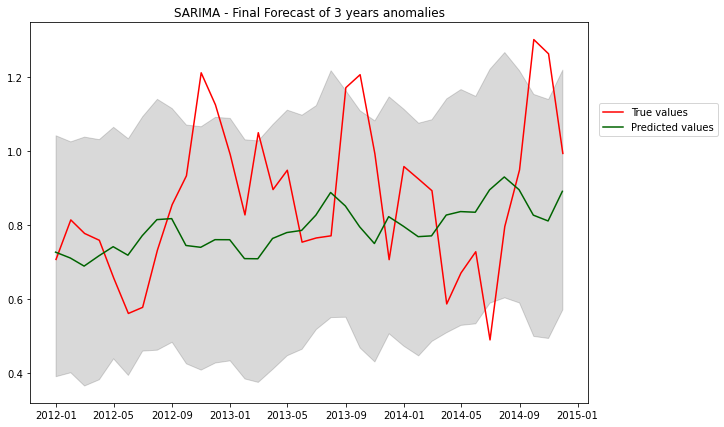

In [33]:
plt.figure(figsize=(10, 7))

plt.plot(df_val['ds'], df_val['y'], color='red', label = "True values")

plt.plot(forecast.iloc[1332:]['ds'], forecast.iloc[1332:]['yhat'], color='darkgreen', label = "Predicted values")

plt.fill_between(forecast.iloc[1332:]['ds'], 
                 forecast.iloc[1332:]['yhat_lower'], 
                 forecast.iloc[1332:]['yhat_upper'], 
                 color='k', alpha=.15)

plt.legend(bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

In [34]:
mse_prophet = ((df_val['y'] - forecast.iloc[1332:]['yhat'])**2).mean()
mse_prophet

0.05201446221905103

# LSTM

L'unica differenza riguarda il fatto che i layer LSTM sono inclusi all'interno di un layer bidirezionale. Il modello così creato è un modello LSTM bidirezionale.  Mettiamo prima i dati nel fomrato corretto

In [35]:
def processData(data, look_back, time_steps):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -time_steps +1):
        X.append(data[i:(i+look_back)].values)
        Y.append(data[(i+look_back):(i+look_back+time_steps)].values)
    return np.array(X),np.array(Y)

In [36]:
time_steps = 36

test_size = time_steps * 2 
train_size = 1 - test_size

train, test = df.iloc[0:train_size-1], df.iloc[train_size-1:len(df)]
print(len(train), len(test))

1296 72


In [37]:
X_train, y_train = processData(train['y'],time_steps, time_steps)
X_test, y_test = processData(test['y'], time_steps, time_steps)

print(X_train.shape, X_test.shape)

(1225, 36) (1, 36)


In [38]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [39]:
model_lstm2 = Sequential(
    [
            layers.Bidirectional(LSTM(units = 100, return_sequences=True)),
            layers.Dropout(0.2),
            layers.Bidirectional(LSTM(units = 50)),
            layers.Dropout(0.2),
            layers.Dense(time_steps, activation='linear')
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Infine l'ultimo modello provato è un modello CNN adattato per il forecasting di serie temporali. E' composto da un layer Convoluzionale 1D con 64 filtri da 3 e attivazione relu, segue poi un MaxPooling layer con pool size pari a 3, un layer flatten e un layer denso. Il tutto viene seguito da un layer di Dropout e l'ultimo layer Denso per la previsione delle n=time_steps osservazioni.

In [40]:
model_lstm2.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))

In [41]:
history_lstm2 = model_lstm2.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=100, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=False
)

Train on 980 samples, validate on 245 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
980/980 [==============================] - 3s 3ms/sample - loss: 0.1992 - val_loss: 0.3336
Epoch 2/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1689 - val_loss: 0.2919
Epoch 3/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1510 - val_loss: 0.2659
Epoch 4/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1508 - val_loss: 0.2449
Epoch 5/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1479 - val_loss: 0.2688
Epoch 6/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1526 - val_loss: 0.2421
Epoch 7/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1469 - val_loss: 0.2765
Epoch 8/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1564 - val_loss: 0.2466
Epoch 9/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.1461 - val_loss: 0.2457
Epoch 10/50
980/980 [==============================] - 1s 1ms/sample - loss: 0.147

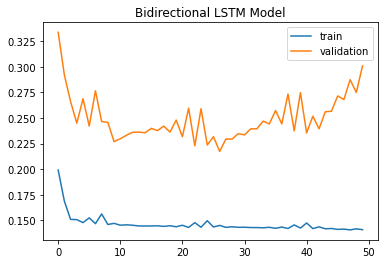

In [42]:
plt.plot(history_lstm2.history['loss'], label='train')
plt.plot(history_lstm2.history['val_loss'], label='validation')
plt.title("Bidirectional LSTM Model")
plt.savefig("lstm2_history.png")

plt.legend();

In [43]:
y_pred_lstm2 = model_lstm2.predict(X_test)

In [44]:
mse_lstm = ((df_val['y'].values - y_pred_lstm2)**2).mean()
mse_lstm

0.3971832497479835

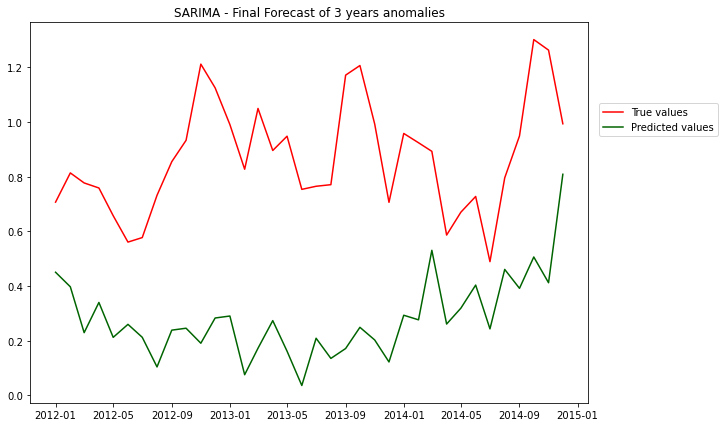

In [45]:
plt.figure(figsize=(10, 7))

plt.plot(df_val['ds'], df_val['y'], color='red', label = "True values")

plt.plot(df_val['ds'], y_pred_lstm2.reshape(-1,1), color='darkgreen', label = "Predicted values")

plt.legend(bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

# CNN

In [46]:
model_cnn = Sequential(
    [
            layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            layers.MaxPooling1D(pool_size=3),
            layers.Flatten(),
            layers.Dense(50, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(time_steps, activation='linear')
    ])

In [47]:
model_cnn.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))

In [48]:
history_cnn = model_cnn.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=100, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=False
)

Train on 980 samples, validate on 245 samples
Epoch 1/50
980/980 [==============================] - 1s 607us/sample - loss: 0.2026 - val_loss: 0.3876
Epoch 2/50
980/980 [==============================] - 0s 26us/sample - loss: 0.1845 - val_loss: 0.3759
Epoch 3/50
980/980 [==============================] - 0s 28us/sample - loss: 0.1736 - val_loss: 0.3737
Epoch 4/50
980/980 [==============================] - 0s 28us/sample - loss: 0.1658 - val_loss: 0.3749
Epoch 5/50
980/980 [==============================] - 0s 27us/sample - loss: 0.1595 - val_loss: 0.3782
Epoch 6/50
980/980 [==============================] - 0s 30us/sample - loss: 0.1553 - val_loss: 0.3821
Epoch 7/50
980/980 [==============================] - 0s 27us/sample - loss: 0.1527 - val_loss: 0.3840
Epoch 8/50
980/980 [==============================] - 0s 28us/sample - loss: 0.1507 - val_loss: 0.3842
Epoch 9/50
980/980 [==============================] - 0s 27us/sample - loss: 0.1497 - val_loss: 0.3852
Epoch 10/50
980/980 [=====

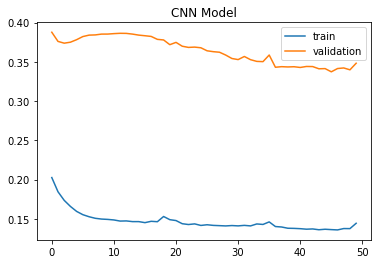

In [49]:
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='validation')
plt.title("CNN Model")
plt.savefig("cnn_history.png")

plt.legend();

In [50]:
y_pred_cnn = model_cnn.predict(X_test)

In [51]:
mse_cnn = ((df_val['y'].values - y_pred_cnn)**2).mean()
mse_cnn

0.6675785212699672

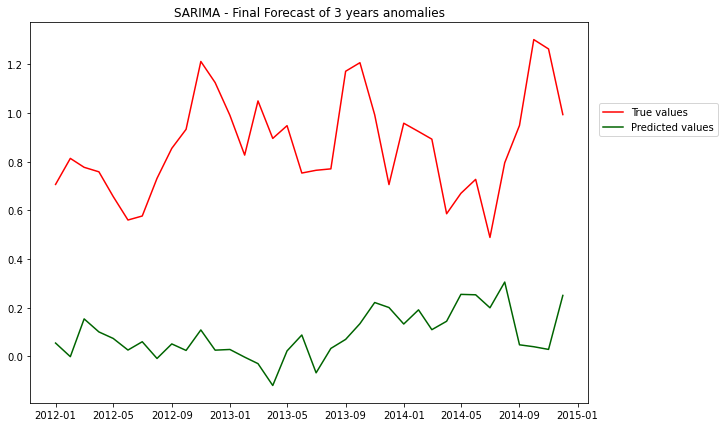

In [52]:
plt.figure(figsize=(10, 7))

plt.plot(df_val['ds'], df_val['y'], color='red', label = "True values")

plt.plot(df_val['ds'], y_pred_cnn.reshape(-1,1), color='darkgreen', label = "Predicted values")

plt.legend(bbox_to_anchor=(1.01, 0.6, 1.1, 0.2), loc='upper left')
plt.title("SARIMA - Final Forecast of 3 years anomalies")
plt.show()

# KNN

Proviamo a fare clustering

# COMPARISON

Faccio le comparazioni tra gli MSE delle serie storiche